1.Data Loading and Exploaration

In [15]:
import pandas as pd
df=pd.read_csv(r"C:\Users\vvais\OneDrive\Documents\Desktop\Desktop\INT375\spam.csv", encoding='latin-1')
df=df[['v1', 'v2']]
df.columns=['label', 'text']
df.dropna(inplace=True)
# Label encode: ham = 0, spam = 1
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
print("Cleaned dataset preview:")
print(df.head())


Cleaned dataset preview:
   label                                               text
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...


Label Distribution:
0    4825
1     747
Name: label, dtype: int64


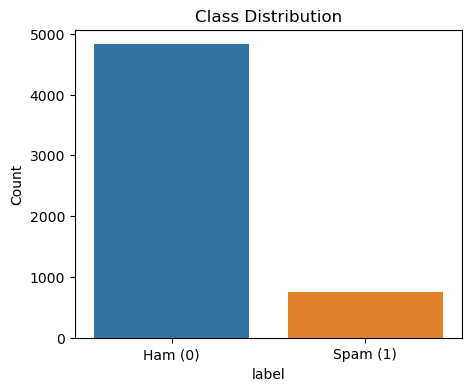

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
print("Label Distribution:")
print(df['label'].value_counts())

plt.figure(figsize=(5, 4))
sns.countplot(x='label', data=df)
plt.xticks([0, 1], ['Ham (0)', 'Spam (1)'])
plt.title("Class Distribution")
plt.ylabel("Count")
plt.show()


2.Data Preprocessing

In [19]:
import re
def clean_text(text):
    # Lowercase and remove non-alphabetic characters
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text
df['clean_text'] = df['text'].apply(clean_text)
df[['text', 'clean_text']].head()


,text,clean_text
0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final...
3,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize the cleaned text
vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
X = vectorizer.fit_transform(df['clean_text'])
y = df['label']

3.Model Training (Clean Labels)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(model, X_train, X_test, y_train, y_test, model_name="Model"):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"🔍 {model_name} Results:")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    print()

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    return {
        "Model": model_name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    }


In [25]:
# Split the vectorized data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

🔍 Logistic Regression Results:
Accuracy:  0.4870
Precision: 0.5050
Recall:    0.0890
F1 Score:  0.1513



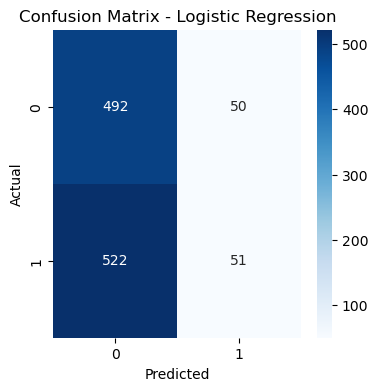

🔍 Support Vector Machine Results:
Accuracy:  0.4987
Precision: 0.5522
Recall:    0.1291
F1 Score:  0.2093



c:\Users\vvais\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


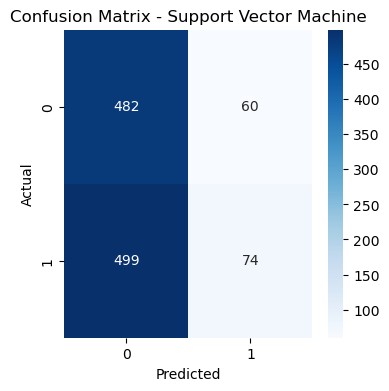

🔍 Random Forest Results:
Accuracy:  0.4942
Precision: 0.5372
Recall:    0.1134
F1 Score:  0.1873



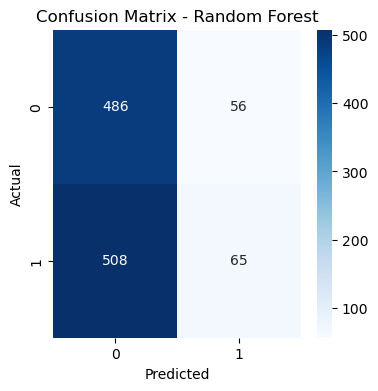

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

results = []
# Logistic Regression
results.append(evaluate_model(LogisticRegression(max_iter=1000), X_train, X_test, y_train, y_test, "Logistic Regression"))
# SVM
results.append(evaluate_model(LinearSVC(), X_train, X_test, y_train, y_test, "Support Vector Machine"))
# Random Forest
results.append(evaluate_model(RandomForestClassifier(n_estimators=100), X_train, X_test, y_train, y_test, "Random Forest"))


4.Injecting Noisy Labels


===== Noise Level: 10% =====
🔍 LogReg (10%) Results:
Accuracy:  0.4870
Precision: 0.5050
Recall:    0.0890
F1 Score:  0.1513



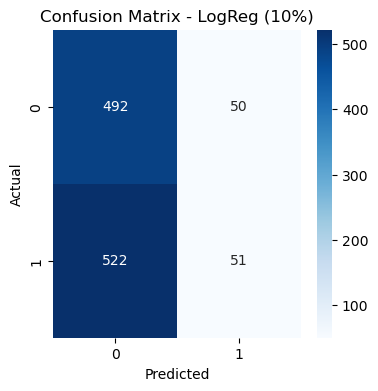

🔍 SVM (10%) Results:
Accuracy:  0.4987
Precision: 0.5522
Recall:    0.1291
F1 Score:  0.2093



c:\Users\vvais\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


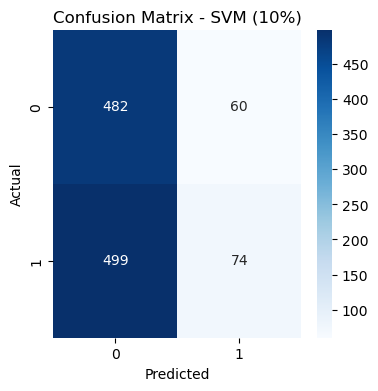

🔍 RF (10%) Results:
Accuracy:  0.4942
Precision: 0.5372
Recall:    0.1134
F1 Score:  0.1873



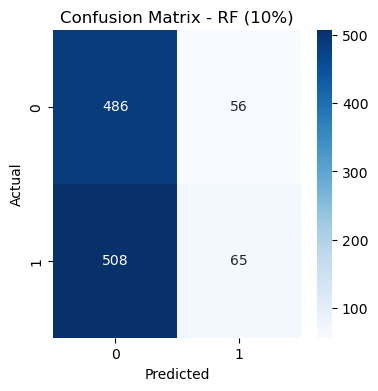


===== Noise Level: 20% =====
🔍 LogReg (20%) Results:
Accuracy:  0.0466
Precision: 0.0198
Recall:    0.0021
F1 Score:  0.0037



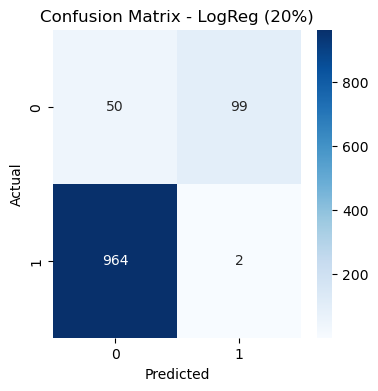

🔍 SVM (20%) Results:
Accuracy:  0.0224
Precision: 0.0373
Recall:    0.0052
F1 Score:  0.0091



c:\Users\vvais\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


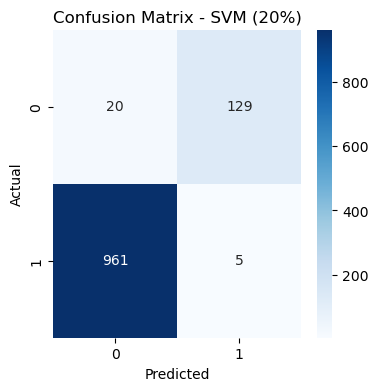

🔍 RF (20%) Results:
Accuracy:  0.0251
Precision: 0.0000
Recall:    0.0000
F1 Score:  0.0000



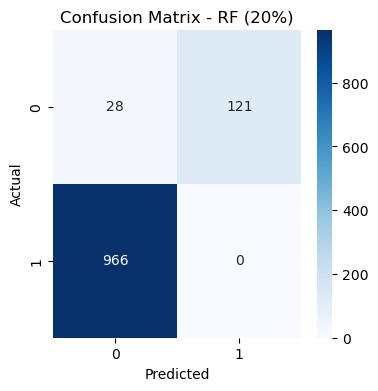


===== Noise Level: 30% =====
🔍 LogReg (30%) Results:
Accuracy:  0.0439
Precision: 0.0280
Recall:    0.0031
F1 Score:  0.0056



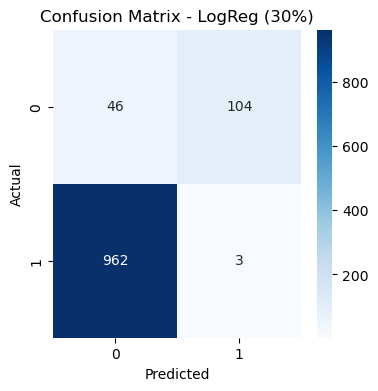

🔍 SVM (30%) Results:
Accuracy:  0.0628
Precision: 0.2561
Recall:    0.0435
F1 Score:  0.0744



c:\Users\vvais\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


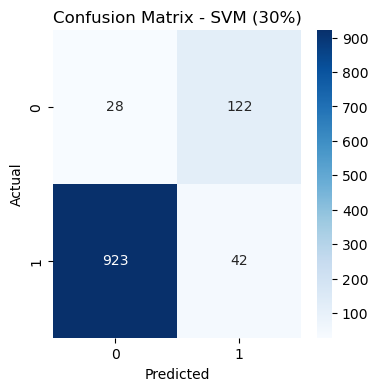

🔍 RF (30%) Results:
Accuracy:  0.0637
Precision: 0.2349
Recall:    0.0363
F1 Score:  0.0628



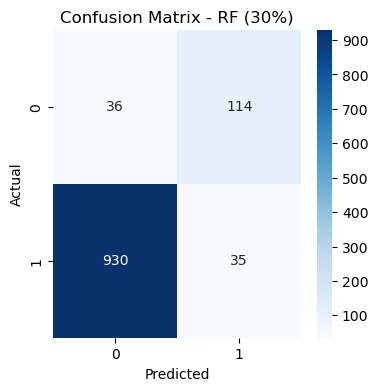


===== Noise Level: 40% =====
🔍 LogReg (40%) Results:
Accuracy:  0.0583
Precision: 0.1368
Recall:    0.0166
F1 Score:  0.0296



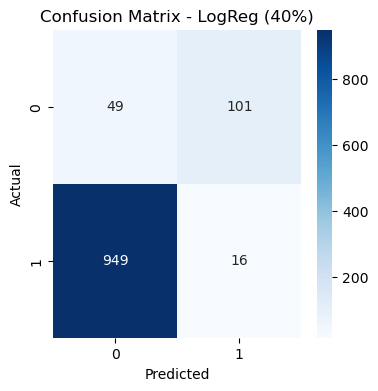

🔍 SVM (40%) Results:
Accuracy:  0.1659
Precision: 0.5709
Recall:    0.1461
F1 Score:  0.2327



c:\Users\vvais\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


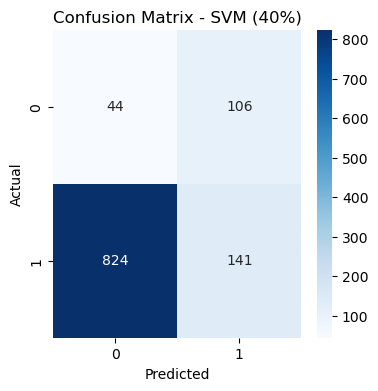

🔍 RF (40%) Results:
Accuracy:  0.1336
Precision: 0.4978
Recall:    0.1171
F1 Score:  0.1896



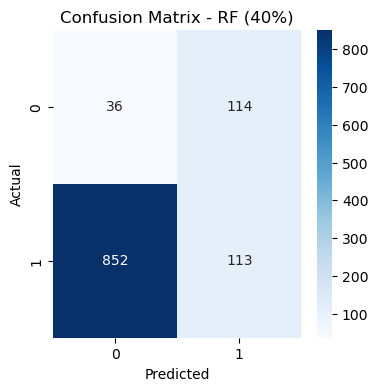


===== Noise Level: 50% =====
🔍 LogReg (50%) Results:
Accuracy:  0.1740
Precision: 0.5982
Recall:    0.1389
F1 Score:  0.2254



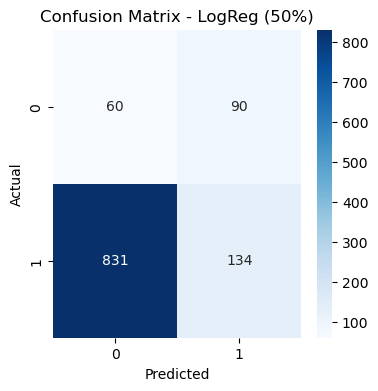

🔍 SVM (50%) Results:
Accuracy:  0.3309
Precision: 0.7731
Recall:    0.3212
F1 Score:  0.4539



c:\Users\vvais\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


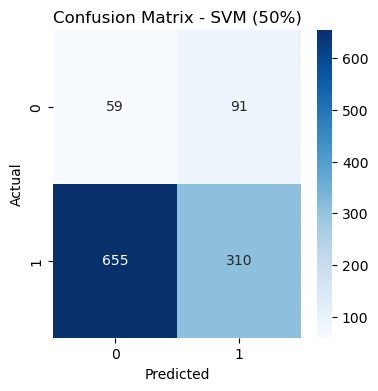

🔍 RF (50%) Results:
Accuracy:  0.2296
Precision: 0.6866
Recall:    0.2021
F1 Score:  0.3122



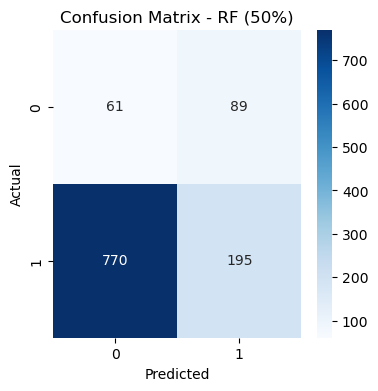

In [31]:
import numpy as np

def inject_label_noise(y, noise_level=0.1, random_state=42):
    np.random.seed(random_state)
    y_noisy = y.copy()

    # Total samples to flip
    n_samples = int(noise_level * len(y_noisy))
    indices_to_flip = np.random.choice(len(y_noisy), n_samples, replace=False)

    # Flip 0 to 1 and 1 to 0
    for i in indices_to_flip:
        y_noisy.iloc[i] = 1 - y_noisy.iloc[i]  # flip 0↔1

    return y_noisy
noise_levels = [0.1, 0.2, 0.3, 0.4, 0.5]
all_results = []

for noise in noise_levels:
    print(f"\n===== Noise Level: {int(noise*100)}% =====")
    y_noisy = inject_label_noise(y, noise_level=noise)

    # Train/test split for noisy labels
    X_train, X_test, y_train, y_test = train_test_split(X, y_noisy, test_size=0.2, random_state=42)

    # Train models on noisy data
    all_results.append(evaluate_model(LogisticRegression(max_iter=1000), X_train, X_test, y_train, y_test, f"LogReg ({int(noise*100)}%)"))
    all_results.append(evaluate_model(LinearSVC(), X_train, X_test, y_train, y_test, f"SVM ({int(noise*100)}%)"))
    all_results.append(evaluate_model(RandomForestClassifier(n_estimators=100), X_train, X_test, y_train, y_test, f"RF ({int(noise*100)}%)"))


c:\Users\vvais\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


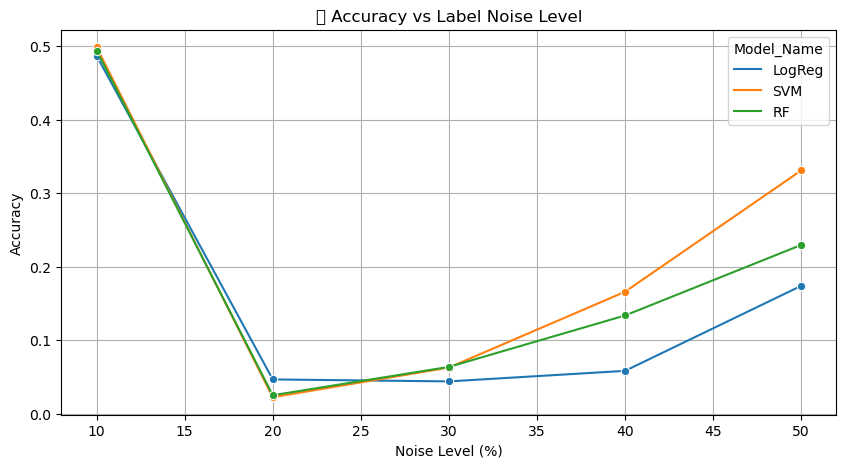

c:\Users\vvais\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


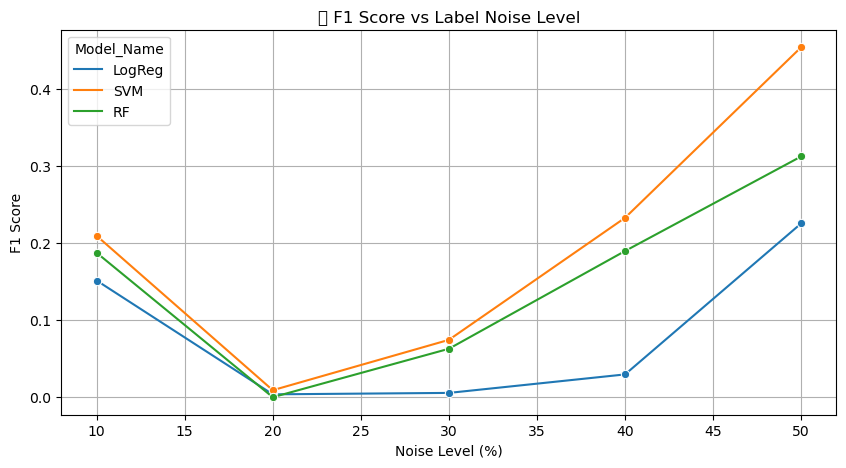

In [ ]:
results_df = pd.DataFrame(all_results)
results_df['Noise_Level'] = results_df['Model'].str.extract(r'(\d+)%').fillna(0).astype(int)
results_df['Model_Name'] = results_df['Model'].str.extract(r'^(.*?) \(').fillna(results_df['Model'])
plt.figure(figsize=(10, 5))
sns.lineplot(data=results_df, x='Noise_Level', y='Accuracy', hue='Model_Name', marker='o')
plt.title("📉 Accuracy vs Label Noise Level")
plt.xlabel("Noise Level (%)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
sns.lineplot(data=results_df, x='Noise_Level', y='F1 Score', hue='Model_Name', marker='o')
plt.title("📉 F1 Score vs Label Noise Level")
plt.xlabel("Noise Level (%)")
plt.ylabel("F1 Score")
plt.grid(True)
plt.show()
